#### KNN: K Nearest Neighbours

In [14]:
from sklearn.datasets import load_iris
import pandas as pd 

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
df0 = df[df['target'] == 0] # setosa
df1 = df[df['target'] == 1] # versicolor
df2 = df[df['target'] == 2] # verginica

print(df0.shape, df1.shape, df2.shape)

(50, 5) (50, 5) (50, 5)


Text(0, 0.5, 'Sepal Width')

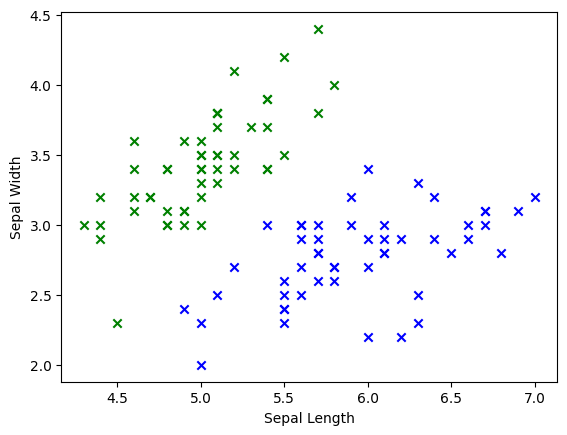

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], marker='x', color='green')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], marker='x', color='blue')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Petal Width')

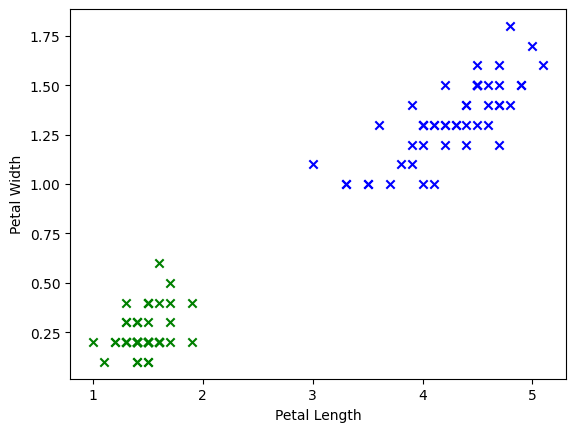

In [18]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], marker='x', color='green')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], marker='x', color='blue')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis=1)
Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10) 
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3) # K = 3 
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.9666666666666667

Text(50.722222222222214, 0.5, 'Truth')

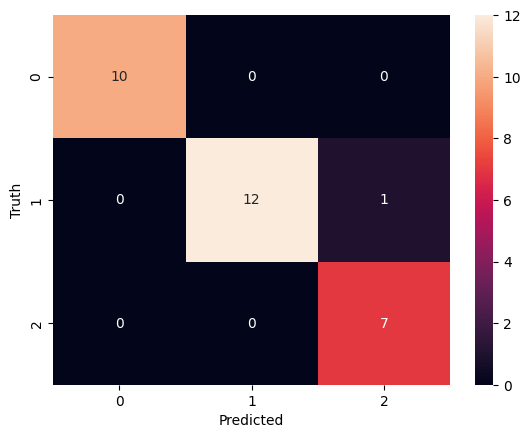

In [23]:
from sklearn.metrics import confusion_matrix

Y_predicted = knn.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted)

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

